In [6]:
#Задание 1
#Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
#- оценка 2 и меньше - низкий рейтинг
#- оценка 4 и меньше - средний рейтинг
#- оценка 4.5 и 5 - высокий рейтинг
#Результат классификации запишите в столбец class

import pandas as pd
import numpy as np

data = pd.read_csv('D:/DS_data_sets/ml-25m/ratings.csv', dtype ={'rating':np.float16, 'movieId':np.int32})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int32  
 2   rating     float16
 3   timestamp  int64  
dtypes: float16(1), int32(1), int64(2)
memory usage: 524.5 MB


In [84]:
%%time

#В варианте с передачей строки Wall time: 4min 10s
#В варианте с одним стоолбцом Wall time: 10.3 s

def return_movie_class(rating):
    if rating <= 2: return 'низкий'
    if 2 < rating <= 4.0: return 'средний'
    if rating > 4.0: return 'высокий'

data['class'] = data['rating'].apply(return_movie_class)


Wall time: 6.64 s


In [85]:
data.sample(10)

,userId,movieId,rating,timestamp,class
6075334,39395,6874,4.0,1500174690,средний
10057727,65267,58295,3.0,1205144724,средний
22763425,147975,2947,3.0,944948188,средний
9798003,63613,3941,1.0,972268565,низкий
2666572,17723,2581,1.0,977337544,низкий
13291879,86012,5218,5.0,1203088024,высокий
1996228,13288,4546,4.0,1463092239,средний
10080033,65382,8713,3.0,1115976592,средний
17828454,115581,837,1.0,891012460,низкий
12412574,80368,1172,2.0,938739837,низкий


In [86]:
#Задание 2
#Используем файл keywords.csv.
#Необходимо написать гео-классификатор, который каждой строке сможет выставить
#географическую принадлежность определенному региону. 
#Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. 
#Если поисковый запрос не содержит названия города, то ставим ‘undefined’.
#Правила распределения по регионам Центр, Северо-Запад и Дальний Восток: в коде
#Результат классификации запишите в отдельный столбец region.

import pandas as pd
import numpy as np

#можно было перевести каждый список городов в множество, строку keyword в множество и вместо in использоать их пересечение
#но по условиям список это список
geo_data = {
'Центр':['москва', 'тула', 'ярославль'],
'Северо-Запад': ['петербург', 'псков', 'мурманск'],
'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

data = pd.read_csv('data_samples/ml-latest-small/keywords.csv')

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   keyword  100000 non-null  object
 1   shows    100000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [88]:
data.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [89]:
def return_region(text):
    region = ''
    
    for key, el in geo_data.items():
        for city in el:
            if city in text.lower():
                return key
            else: region = 'undefined'
    
    return region
    

data['region'] = data['keyword'].apply(return_region)
data.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


In [90]:
data['region'].value_counts()

undefined         99253
Центр               387
Северо-Запад        266
Дальний Восток       94
Name: region, dtype: int64

In [91]:
#Группировка
data.groupby('region').agg({'shows':['max', 'min'],'keyword':['count']})

shows       keyword
                     max   min   count
region                                
undefined       64292779  1942   99253
Дальний Восток    176951  3870      94
Северо-Запад      425134  3606     266
Центр             979292  3673     387

In [109]:
#Задание 3

import pandas as pd
import numpy as np


data_m = pd.read_csv('data_samples/ml-latest-small/movies.csv')
data_r = pd.read_csv('data_samples/ml-latest-small/ratings.csv')

data_m.pop('genres')

years = list(range(1950,2011))

def production_year(title):
    for el in years:
        if str(el) in title:
            return el
    return 1940 #если та
        
data_m['year'] = data_m['title'].apply(production_year)

In [93]:
data_m.sample(10)

,movieId,title,year
8946,137595,Magic Mike XXL (2015),1950
2996,3744,Shaft (2000),2000
2919,3662,Puppet Master III: Toulon's Revenge (1991),1991
8999,141866,Green Room (2015),1950
1544,1982,Halloween (1978),1978
6650,51418,Breaking and Entering (2006),2006
3726,4753,Vamp (1986),1986
8292,101362,Olympus Has Fallen (2013),1950
8992,140928,Joy (2015),1950
7346,71525,A-Haunting We Will Go (1942),1950


In [110]:
#merge
data_m_r = pd.merge(data_r.groupby('movieId')['rating'].mean().reset_index(),data_m, on=('movieId'))

result_data = data_m_r.groupby('year')['rating'].mean().reset_index().sort_values('rating', ascending = False)
result_data.head()

,year,rating
2,1951,3.906653
3,1952,3.802318
13,1962,3.772962
4,1953,3.738878
8,1957,3.693322


<AxesSubplot:xlabel='year', ylabel='rating'>

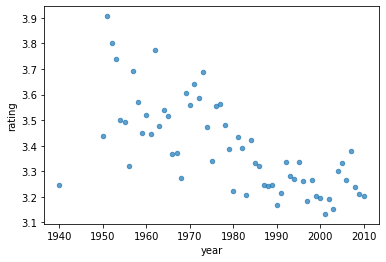

In [111]:
result_data[['year','rating']].plot.scatter(x = 'year', y = 'rating', alpha = 0.7)

<AxesSubplot:xlabel='year', ylabel='rating'>

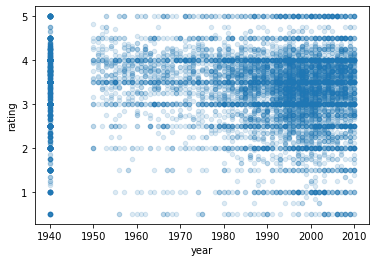

In [112]:
#Было видно даже без сортировки ((

data_m_r[['year','rating']].plot.scatter(x = 'year', y = 'rating', alpha = 0.15)